<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 80px">

# Project 4: Part 3
# Modelling

### Contents:
- [Packages](#Import-Packages)
- [Dataset](#Import-Dataset)
    - [Preparation](#Preparing-Train-&-Test-Data)
- [Modelling](#Modelling-Preperation)
    - [Used Models](#Models-To-Use)
    - [Baseline Accuracy](#Baseline-Accuracy)
    - [Train/Test](#Train/Test-Split)
    - [Pipeline](#Pipeline-Creation)
    - [Model Fit & Score](#Fit-and-Score-Models)
- [Summary](#Summary-of-Results)
- [Kaggle Submission](#Kaggle-Submission)

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, make_scorer, accuracy_score, classification_report, roc_auc_score, plot_roc_curve, roc_curve
pd.options.mode.chained_assignment = None 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

------------

# Import Dataset

In [2]:
#Train Data
df = pd.read_csv('train_weather_spray_merged.csv')
#Test Data
df_test = pd.read_csv('test.csv')
df_weather = pd.read_csv('weather.csv')
#Submission Train Data
df_submission = pd.read_csv('train_weather_spray_merged.csv')

In [3]:
#Train Data Preview
df.head(3)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,BCFG,TS,VCTS,TSRA,SN,BR,FU,GR,DZ,FG,SQ,MIFG,HZ,VCFG,RA,FG+
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74.0,58,65.0,0.0,9.0,0421,1917,0.0,29.39,30.11,5.8,18,6.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74.0,58,65.0,0.0,9.0,0421,1917,0.0,29.39,30.11,5.8,18,6.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,88,60,74.0,58,65.0,0.0,9.0,0421,1917,0.0,29.39,30.11,5.8,18,6.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [4]:
#Test Data Preview
df_test.head(3)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


-----------

## Preparing Train & Test Data

### Train Data

In [5]:
df.shape

(10440, 44)

In [6]:
#Exploring required features
df.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'station', 'tmax', 'tmin', 'tavg',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'BCFG', 'TS', 'VCTS', 'TSRA', 'SN', 'BR', 'FU', 'GR', 'DZ',
       'FG', 'SQ', 'MIFG', 'HZ', 'VCFG', 'RA', 'FG+'],
      dtype='object')

Below Train Features will not be used for our Modeling.

__Target Variable__
- 'wnvpresent'

__Usage of Longitude and Latitude is sufficient for location__
- 'address'
- 'block'
- 'street'
- 'addressnumberandstreet'
- 'addressaccuracy'

__When the sun rises or sets shows mainly the activity of Mozzies and does not relate to our Problem Statement__
- 'sunrise'
- 'sunset'

__Misc Features__
- 'station'
- 'stationpressure'
- 'sealevel'
- 'resultdir'


In [7]:
#Drop unnecessary Features
df.drop(columns = ['address','block','street','addressnumberandstreet','addressaccuracy',
                   'sunrise','sunset','station','stnpressure','sealevel','resultdir'], inplace = True)

In [8]:
#Checking Data Types
df.dtypes

date             object
species          object
trap             object
latitude        float64
longitude       float64
nummosquitos      int64
wnvpresent        int64
tmax              int64
tmin              int64
tavg            float64
dewpoint          int64
wetbulb         float64
heat            float64
cool            float64
preciptotal     float64
resultspeed     float64
avgspeed        float64
BCFG              int64
TS                int64
VCTS              int64
TSRA              int64
SN                int64
BR                int64
FU                int64
GR                int64
DZ                int64
FG                int64
SQ                int64
MIFG              int64
HZ                int64
VCFG              int64
RA                int64
FG+               int64
dtype: object

#### Handling Date Feature

In [9]:
#Converting Date to Datetime type and converting to Ordinal
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].apply(lambda x: x.toordinal())

#### Handling Species Feature

In [10]:
#Finding Unique Values
df['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX sp.'], dtype=object)

In [11]:
#Mapping Unique Values
df['species'] = df['species'].map({'CULEX PIPIENS/RESTUANS': 3,
                                   'CULEX RESTUANS': 2,
                                   'CULEX PIPIENS': 1,'CULEX sp.': 0})

In [12]:
df['species'].unique()

array([3, 2, 1, 0], dtype=int64)

#### Handling Trap Feature

In [13]:
#Finding Unique Values
df['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T049', 'T050', 'T054', 'T143',
       'T148', 'T153', 'T046', 'T048', 'T086', 'T091', 'T094', 'T096',
       'T129', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T033', 'T141', 'T142', 'T146', 'T147', 'T149', 'T150', 'T151',
       'T154', 'T218', 'T220', 'T031', 'T089', 'T090', 'T092', 'T135',
       'T145', 'T152', 'T158', 'T162', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T037', 'T219', 'T034', 'T040', 'T043', 'T047', 'T051',
       'T085', 'T088', 'T161', 'T013', 'T014', 'T018', 'T030', 'T144',
       'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T039', 'T084',
       'T035', 'T036', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T027', 'T078', 'T097', 'T099', 'T100', 'T102',
      

In [14]:
#OneHot Encode Feature
trap_dummies = pd.get_dummies(df[['trap']], drop_first=True)
df = df.join(trap_dummies)
df.drop(['trap'], axis=1,inplace=True)

In [15]:
df.dtypes

date              int64
species           int64
latitude        float64
longitude       float64
nummosquitos      int64
wnvpresent        int64
tmax              int64
tmin              int64
tavg            float64
dewpoint          int64
wetbulb         float64
heat            float64
cool            float64
preciptotal     float64
resultspeed     float64
avgspeed        float64
BCFG              int64
TS                int64
VCTS              int64
TSRA              int64
SN                int64
BR                int64
FU                int64
GR                int64
DZ                int64
FG                int64
SQ                int64
MIFG              int64
HZ                int64
VCFG              int64
RA                int64
FG+               int64
trap_T002         uint8
trap_T003         uint8
trap_T004         uint8
trap_T005         uint8
trap_T006         uint8
trap_T007         uint8
trap_T008         uint8
trap_T009         uint8
trap_T011         uint8
trap_T012       

### Test Data

In [16]:
df_test.shape

(116293, 11)

In [17]:
#Create test id for Kaggle Submission
df_test_id = df_test['Id']

In [18]:
df_test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [19]:
#Convert columns to lower case to match training data
df_test.columns= df_test.columns.str.strip().str.lower()
df_weather.columns = df_weather.columns.str.strip().str.lower()

In [20]:
df_test_merged = pd.merge(df_weather, df_test)

In [21]:
df_test_merged.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'id', 'address', 'species',
       'block', 'street', 'trap', 'addressnumberandstreet', 'latitude',
       'longitude', 'addressaccuracy'],
      dtype='object')

Similar to train data we will be dropping features not necessary and alike to our train data

In [22]:
#Check for difference in data columns
set(df_test_merged.columns) - set(df.columns) 

{'address',
 'addressaccuracy',
 'addressnumberandstreet',
 'block',
 'codesum',
 'depart',
 'depth',
 'id',
 'resultdir',
 'sealevel',
 'snowfall',
 'station',
 'stnpressure',
 'street',
 'sunrise',
 'sunset',
 'trap',
 'water1'}

In [23]:
#Drop unnecessary Features, codesum will be required to be onehotencoded
df_test_merged.drop(columns = ['address','addressaccuracy','addressnumberandstreet',
                               'block','depart','depth','id','resultdir',
                              'sealevel','snowfall','station','stnpressure','street',
                              'sunrise','sunset','water1'], inplace = True)

In [24]:
#Data Types
df_test_merged.dtypes

date            object
tmax             int64
tmin             int64
tavg            object
dewpoint         int64
wetbulb         object
heat            object
cool            object
codesum         object
preciptotal     object
resultspeed    float64
avgspeed        object
species         object
trap            object
latitude       float64
longitude      float64
dtype: object

#### Handling Date Feature

In [25]:
#Converting Date to Datetime type and converting to Ordinal
df_test_merged['date'] = pd.to_datetime(df_test_merged['date'])
df_test_merged['date']=df_test_merged['date'].apply(lambda x: x.toordinal())

#### Handling tavg Feature

In [26]:
df_test_merged['tavg'] = df_test_merged['tavg'].replace('M', np.nan)
df_test_merged.dropna(axis = 0, inplace = True)
df_test_merged['tavg'] = df_test_merged['tavg'].astype(float)

#### Handling wetbulb Feature

In [27]:
df_test_merged['wetbulb'] = df_test_merged['wetbulb'].replace('M', np.nan)
df_test_merged.dropna(axis = 0, inplace = True)
df_test_merged['wetbulb'] = df_test_merged['wetbulb'].astype(float)

#### Handling heat & cool Feature

In [28]:
#Heat Feature
df_test_merged[df_test_merged['heat'] == 'M']
df_test_merged['heat'] = df_test_merged['heat'].astype(float)
#Cool Feature
df_test_merged[df_test_merged['cool'] == 'M']
df_test_merged['cool'] = df_test_merged['cool'].astype(float)

#### Handling codesum Feature

In [29]:
codesums  = set(df_test_merged.codesum.str.split(' ').map(tuple))

codes = set()
for cs in codesums:
    for code in cs:
        codes.add(code)
codes.discard('')
codes = list(codes)

In [30]:
def build_df_codesum(row, codes):
    cs = set(row['codesum'].split())
    code_out = [int(code in cs) for code in codes]
    code_out = pd.Series(data=code_out, index=codes)
    return code_out

df_test_merged[codes] = df_test_merged.apply(lambda row:build_df_codesum(row, codes), 1)

In [31]:
df_test_merged.drop('codesum', axis = 1, inplace = True)

#### Handling preciptotal Feature

In [32]:
df_test_merged[df_test_merged['preciptotal'] == 'M']
df_test_merged['preciptotal'] = df_test_merged['preciptotal'].replace('M', np.nan)
df_test_merged.dropna(axis = 0, inplace = True)
df_test_merged['preciptotal'] = df_test_merged['preciptotal'].map(lambda x: x.replace('T', '0.001')).astype(float)
df_test_merged['preciptotal'] = df_test_merged['preciptotal'].astype(float)

#### Handling avgspeed Feature

In [33]:
df_test_merged[df_test_merged['avgspeed'] == 'M']
df_test_merged['avgspeed'] = df_test_merged['avgspeed'].astype(float)

#### Handling species Feature

In [34]:
#Finding Unique Values
df_test_merged['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [35]:
df_test_merged['species'].value_counts()

CULEX PIPIENS/RESTUANS    30718
CULEX RESTUANS            29340
CULEX PIPIENS             29042
CULEX SALINARIUS          28710
CULEX TERRITANS           28702
CULEX TARSALIS            28694
UNSPECIFIED CULEX         28690
CULEX ERRATICUS           28690
Name: species, dtype: int64

In [36]:
df_test_merged['species']=df_test_merged['species'].map({'CULEX PIPIENS/RESTUANS':'CULEX PIPIENS/RESTUANS',
                                           'CULEX RESTUANS': 'CULEX RESTUANS',
                                           'CULEX PIPIENS': 'CULEX PIPIENS',
                                           'CULEX TERRITANS': 'CULEX sp.',
                                           'CULEX SALINARIUS': 'CULEX sp.',
                                           'CULEX TARSALIS': 'CULEX sp.',
                                           'CULEX ERRATICUS': 'CULEX sp.',
                                          'UNSPECIFIED CULEX': 'CULEX sp.'})

In [37]:
df_test_merged['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX sp.'], dtype=object)

In [38]:
#Mapping Unique Values
df_test_merged['species'] = df_test_merged['species'].map({'CULEX PIPIENS/RESTUANS': 3,
                                             'CULEX RESTUANS': 2,
                                             'CULEX PIPIENS': 1,'CULEX sp.': 0})

In [39]:
df_test_merged['species'].unique()

array([3, 2, 1, 0], dtype=int64)

#### Handling Trap Feature

In [40]:
#Finding Unique Values
df_test_merged['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [41]:
#OneHot Encode Feature
trap_dummies = pd.get_dummies(df_test_merged[['trap']], drop_first=True)
df_test_merged = df_test_merged.join(trap_dummies)
df_test_merged.drop(['trap'], axis=1,inplace=True)

In [42]:
set(df_test_merged.columns) - set(df.columns) 

{'trap_T002A',
 'trap_T002B',
 'trap_T065A',
 'trap_T090A',
 'trap_T090B',
 'trap_T090C',
 'trap_T128A',
 'trap_T200A',
 'trap_T200B',
 'trap_T218A',
 'trap_T218B',
 'trap_T218C',
 'trap_T234'}

In [43]:
set(df.columns) - set(df_test_merged.columns) 

{'FG', 'FU', 'GR', 'MIFG', 'SN', 'SQ', 'VCFG', 'nummosquitos', 'wnvpresent'}

#### Handling Redundant Feature and Null Values

In [44]:
df.drop(columns = ['FG','FU','GR','MIFG','SN','SQ','VCFG','nummosquitos'],inplace = True)

In [45]:
df_test_merged.drop(columns =['trap_T002A','trap_T002B','trap_T065A',
                              'trap_T090A','trap_T090B','trap_T090C',
                              'trap_T128A','trap_T200A','trap_T200B',
                              'trap_T218A','trap_T218B','trap_T218C',
                              'trap_T234'], inplace = True)

In [46]:
set(df_test_merged.columns) - set(df.columns) 

set()

In [47]:
set(df.columns) - set(df_test_merged.columns) 

{'wnvpresent'}

In [48]:
df_test_merged.isnull().sum()

date           0
tmax           0
tmin           0
tavg           0
dewpoint       0
wetbulb        0
heat           0
cool           0
preciptotal    0
resultspeed    0
avgspeed       0
species        0
latitude       0
longitude      0
DZ             0
TSRA           0
FG+            0
BR             0
VCTS           0
BCFG           0
HZ             0
RA             0
TS             0
trap_T002      0
trap_T003      0
trap_T004      0
trap_T005      0
trap_T006      0
trap_T007      0
trap_T008      0
trap_T009      0
trap_T011      0
trap_T012      0
trap_T013      0
trap_T014      0
trap_T015      0
trap_T016      0
trap_T017      0
trap_T018      0
trap_T019      0
trap_T025      0
trap_T027      0
trap_T028      0
trap_T030      0
trap_T031      0
trap_T033      0
trap_T034      0
trap_T035      0
trap_T036      0
trap_T037      0
trap_T039      0
trap_T040      0
trap_T043      0
trap_T044      0
trap_T045      0
trap_T046      0
trap_T047      0
trap_T048      0
trap_T049     

In [49]:
df_test.dtypes

id                          int64
date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
dtype: object

----------

# Modelling Preperation

-----------

## Models To Use

__**Suggested models to use for classification**__

1. Logistics Regression
2. GradientBoost
3. AdaBoost
4. RandomForest 

-----

## Baseline Accuracy

In [167]:
#Baseline Sensitivity/Specificity
round(y_train.value_counts(normalize=True),3)

0    0.946
1    0.054
Name: wnvpresent, dtype: float64

The model will require to predict with a specificity of 0.947 of WNV not being present and a sensitivity of 0.053 of WNV being present

---------

## Train/Test Split

In [50]:
features = [i for i in df.columns if i not in ['wnvpresent','address','block','street','addressnumberandstreet',
                                               'addressaccuracy','sunrise','sunset']]
X = df[features]
y = df['wnvpresent']

In [51]:
# Scaling all variables except for Date
X_scaled = X.copy()

col_names = [i for i in X.columns if i not in ['date']]
features_to_scale = X_scaled[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features_to_scale.values)
features_to_scale = scaler.transform(features_to_scale.values)

X_scaled[col_names] = features_to_scale

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, stratify=y, random_state = 42)

---------

## Pipeline Creation

### Logistics Regression

In [125]:
#Creating Pipeline for Logistics Regression
pipe_lg = Pipeline([("scale", StandardScaler()), ("model", LogisticRegression(random_state=42))])

param_grid_lg = {'model__C': np.linspace(0.1,1,5),
                 'model__max_iter': (1000,1500,2000),
                 'model__solver' : ['newton-cg', 'lbfgs', 'liblinear']}

scorers = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs_lg = GridSearchCV(pipe_lg, param_grid_lg,cv = 5, scoring = scorers,refit = 'AUC')

### GradientBoost

In [134]:
#Creating Pipeline for GradientBoost
pipe_gb = Pipeline([("scale", StandardScaler()), ("model", GradientBoostingClassifier(random_state=42))])

param_grid_gb = {'model__n_estimators': (100, 120, 140, 160),
                'model__max_depth': (1, 2, 3),
                'model__min_samples_split' : (2, 4, 6),
                'model__min_samples_leaf' : [1, 2, 3],
                'model__learning_rate' : (.08, .1, .12)}

scorers = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs_gb = RandomizedSearchCV(pipe_gb, param_grid_gb,cv = 5, scoring = scorers,refit = 'AUC')

### AdaBoost

In [57]:
#Creating Pipeline for AdaBoost
pipe_ab = Pipeline([("scale", StandardScaler()), ("model", AdaBoostClassifier())])

param_grid_ab = {'model__n_estimators': (20, 40, 60),
                'model__learning_rate' : ( .8, .9, 1)}

scorers = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs_ab = GridSearchCV(pipe_ab, param_grid_ab,cv = 5, scoring = scorers,refit = 'AUC')

### RandomForest

In [58]:
#Creating Pipeline for RandomForest
pipe_rf = Pipeline([("scale", StandardScaler()), ("model", RandomForestClassifier(random_state=42))])

param_grid_rf = {'model__n_estimators': (100,120,140),
                'model__max_depth': (1, 2, 3),
                'model__min_samples_leaf': (2, 4),
                'model__min_samples_split': (2, 4)}

scorers = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs_rf = RandomizedSearchCV(pipe_rf, param_grid_rf,cv = 5, scoring = scorers,refit = 'AUC')

----------

## Fit and Score Models

### Logistics Regression

In [126]:
#Fitting Pipeline into the GridSearchCV
gs_lg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'model__C': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                         'model__max_iter': (1000, 1500, 2000),
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             refit='AUC', scoring='recall')

In [127]:
gs_lg.best_params_

{'model__C': 0.1, 'model__max_iter': 1000, 'model__solver': 'newton-cg'}

In [128]:
print(f'The Train score is {gs_lg.score(X_train, y_train)}')
print(f'The Test score is {gs_lg.score(X_test, y_test)}')

The Train score is 0.002544529262086514
The Test score is 0.0


In [129]:
# Get predictions
preds = gs_lg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

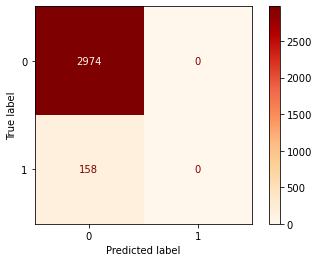

In [130]:
cm_lg = plot_confusion_matrix(gs_lg, X_test, y_test, cmap='OrRd', values_format='d');

In [131]:
lg_new = LogisticRegression(C = 0.1, max_iter=1000,solver='liblinear')
lg_new.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [132]:
lg_new_coef = pd.DataFrame({'Coeffiecient':X.columns,'Values':np.abs(lg_new.coef_[0])})
lg_new_coef.sort_values('Values', inplace=True, ascending=False)
lg_new_coef.set_index('Coeffiecient',inplace = True)
lg_new_coef.head(10)

,Values
Coeffiecient,
date,3.907449e-06
dewpoint,2.200639e-12
wetbulb,2.046834e-12
tmin,1.872665e-12
BR,1.687499e-12
tavg,1.618392e-12
cool,1.470604e-12
heat,1.355493e-12
resultspeed,1.300408e-12


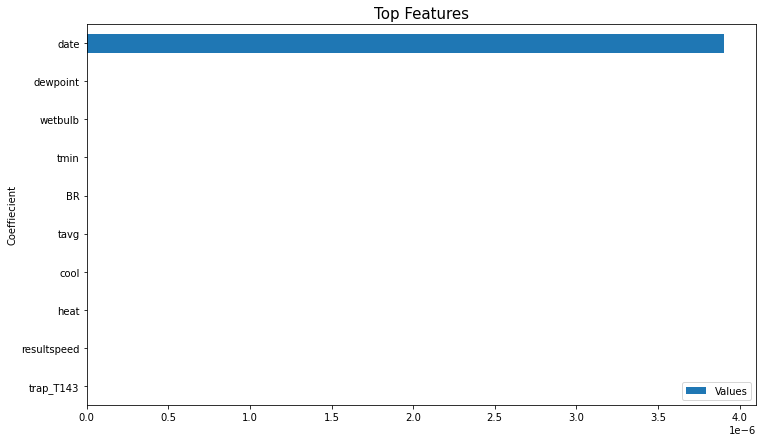

In [133]:
lg_new_coef['Values'].head(10).plot(kind='barh', figsize=(12,7))
plt.title('Top Features', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

#### ROC AUC Curve

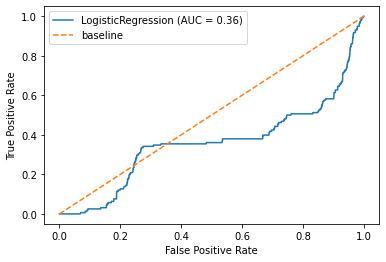

In [67]:
plot_roc_curve(lg_new, X_test,y_test)
plt.plot([0,1], [0,1],label = 'baseline',linestyle='--')
plt.legend();

In [68]:
#Used for ROC-AUC Plot combination in summary
lg_new_probs = lg_new.predict_proba(X_test)
lg_new_probs = lg_new_probs[:, 1]
lg_auc = roc_auc_score(y_test, lg_new_probs)

#Calculating ROC Curve
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_new_probs)

#### Sensitivity/Recall and F1-Score

In [69]:
lg_new_pred = lg_new.predict(X_test)
print(classification_report(y_test, lg_new_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2974
           1       0.00      0.00      0.00       158

    accuracy                           0.95      3132
   macro avg       0.47      0.50      0.49      3132
weighted avg       0.90      0.95      0.92      3132



C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GradientBoost

In [135]:
gs_gb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('model',
                                              GradientBoostingClassifier(random_state=42))]),
                   param_distributions={'model__learning_rate': (0.08, 0.1,
                                                                 0.12),
                                        'model__max_depth': (1, 2, 3),
                                        'model__min_samples_leaf': [1, 2, 3],
                                        'model__min_samples_split': (2, 4, 6),
                                        'model__n_estimators': (100, 120, 140,
                                                                160)},
                   refit='AUC', scoring='recall')

In [136]:
gs_gb.best_params_

{'model__n_estimators': 100,
 'model__min_samples_split': 6,
 'model__min_samples_leaf': 1,
 'model__max_depth': 3,
 'model__learning_rate': 0.1}

In [137]:
print(f'The Train score is {gs_gb.score(X_train, y_train)}')
print(f'The Test score is {gs_gb.score(X_test, y_test)}')

The Train score is 0.06615776081424936
The Test score is 0.012658227848101266


In [138]:
# Get predictions
preds = gs_gb.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

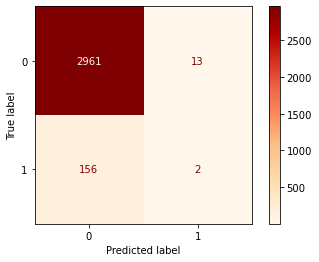

In [139]:
plot_confusion_matrix(gs_gb, X_test, y_test, cmap='OrRd', values_format='d');

In [140]:
gb_new = GradientBoostingClassifier(n_estimators = 160,
                                    min_samples_split=2,
                                   min_samples_leaf=3,
                                   max_depth=3,
                                   learning_rate=.08)
gb_new.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08, min_samples_leaf=3,
                           n_estimators=160)

In [141]:
gb_new.feature_importances_

array([4.40669750e-01, 4.14993429e-02, 2.83165464e-02, 8.42633383e-02,
       2.29048684e-02, 3.46348230e-02, 2.16628376e-02, 4.25101951e-02,
       2.39321040e-02, 0.00000000e+00, 1.46289929e-02, 3.05963592e-02,
       4.39487423e-02, 2.02637906e-02, 0.00000000e+00, 4.92968001e-05,
       3.35195836e-04, 3.13009887e-04, 3.67153352e-03, 0.00000000e+00,
       3.06865690e-04, 1.06028285e-04, 0.00000000e+00, 6.30298796e-03,
       1.05407088e-02, 0.00000000e+00, 6.27413651e-03, 1.54834727e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.40566516e-03, 0.00000000e+00,
       9.12276591e-05, 1.17106874e-03, 1.04869155e-04, 0.00000000e+00,
       0.00000000e+00, 5.83547974e-03, 1.02740645e-03, 7.74439628e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.90525125e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.67623125e-04, 0.00000000e+00, 1.28430496e-03, 5.69307960e-04,
      

In [142]:
gb_new_coef = pd.DataFrame({'Coeffiecient':X.columns,'Values':np.abs(gb_new.feature_importances_)})
gb_new_coef.sort_values('Values', inplace=True, ascending=False)
gb_new_coef.set_index('Coeffiecient',inplace = True)
gb_new_coef.head(10)

,Values
Coeffiecient,
date,0.440670
longitude,0.084263
resultspeed,0.043949
dewpoint,0.042510
species,0.041499
tmin,0.034635
preciptotal,0.030596
latitude,0.028317
wetbulb,0.023932


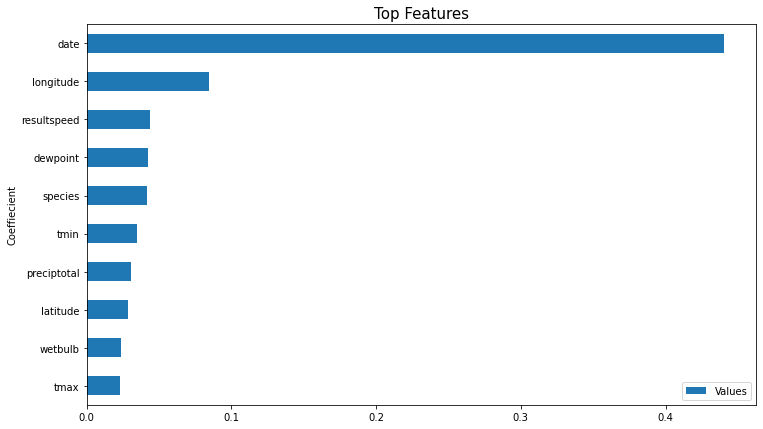

In [143]:
gb_new_coef['Values'].head(10).plot(kind='barh', figsize=(12,7))
plt.title('Top Features', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

#### ROC AUC Curve

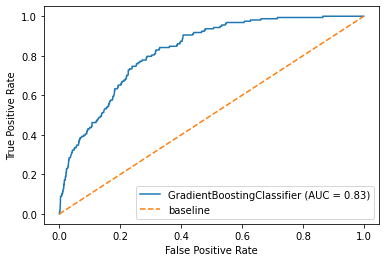

In [79]:
plot_roc_curve(gb_new, X_test,y_test)
plt.plot([0,1], [0,1],label = 'baseline',linestyle='--')
plt.legend();

In [80]:
#Used for ROC-AUC Plot combination in summary
gb_new_probs = gb_new.predict_proba(X_test)
gb_new_probs = gb_new_probs[:, 1]
gb_auc = roc_auc_score(y_test, gb_new_probs)

#Calculating ROC Curve
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_new_probs)

#### Sensitivity/Recall and F1-Score

In [81]:
gb_new_pred = gb_new.predict(X_test)
print(classification_report(y_test, gb_new_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2974
           1       0.29      0.01      0.02       158

    accuracy                           0.95      3132
   macro avg       0.62      0.51      0.50      3132
weighted avg       0.92      0.95      0.93      3132



### AdaBoost

In [82]:
gs_ab.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', AdaBoostClassifier())]),
             param_grid={'model__learning_rate': (0.8, 0.9, 1),
                         'model__n_estimators': (20, 40, 60)},
             refit='AUC',
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)})

In [83]:
gs_ab.best_params_

{'model__learning_rate': 0.9, 'model__n_estimators': 20}

In [84]:
print(f'The Train score is {gs_ab.score(X_train, y_train)}')
print(f'The Test score is {gs_ab.score(X_test, y_test)}')

The Train score is 0.8382912096909215
The Test score is 0.8214547172541775


In [85]:
# Get predictions
preds = gs_ab.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

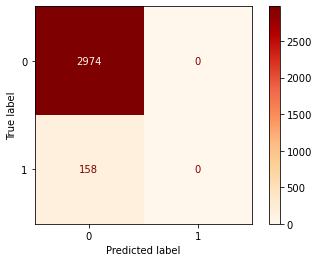

In [86]:
plot_confusion_matrix(gs_ab, X_test, y_test, cmap='OrRd', values_format='d');

In [87]:
ad_new = AdaBoostClassifier(learning_rate = 1, n_estimators = 40)
ad_new.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=40)

In [88]:
ad_new.feature_importances_

array([0.275, 0.1  , 0.025, 0.025, 0.   , 0.025, 0.075, 0.   , 0.1  ,
       0.   , 0.05 , 0.   , 0.05 , 0.   , 0.   , 0.   , 0.025, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.025, 0.025, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.   ,
       0.   , 0.025, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.025, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [89]:
ad_new_coef = pd.DataFrame({'Coeffiecient':X.columns,'Values':np.abs(ad_new.feature_importances_)})
ad_new_coef.sort_values('Values', inplace=True, ascending=False)
ad_new_coef.set_index('Coeffiecient',inplace = True)
ad_new_coef.head(10)

,Values
Coeffiecient,
date,0.275
species,0.100
wetbulb,0.100
tavg,0.075
cool,0.050
resultspeed,0.050
trap_T200,0.025
trap_T017,0.025
trap_T018,0.025


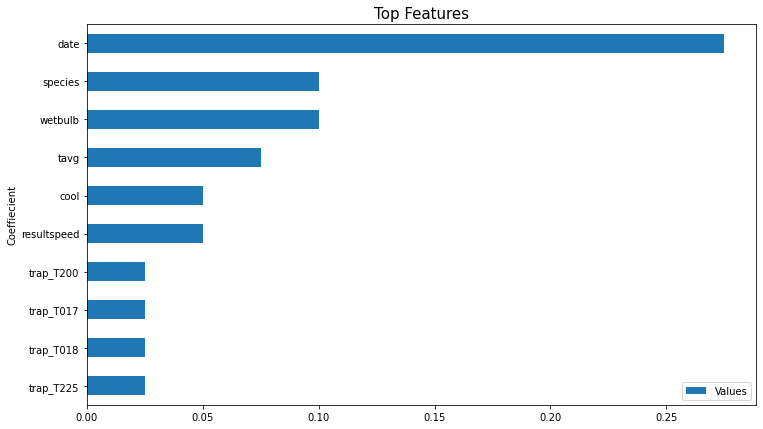

In [90]:
ad_new_coef['Values'].head(10).plot(kind='barh', figsize=(12,7))
plt.title('Top Features', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

#### ROC AUC Curve

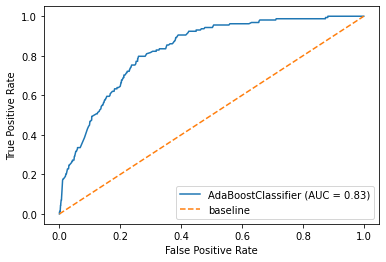

In [91]:
plot_roc_curve(ad_new, X_test,y_test)
plt.plot([0,1], [0,1],label = 'baseline',linestyle='--')
plt.legend();

In [92]:
#Used for ROC-AUC Plot combination in summary
ad_new_probs = ad_new.predict_proba(X_test)
ad_new_probs = ad_new_probs[:, 1]
ad_auc = roc_auc_score(y_test, ad_new_probs)

#Calculating ROC Curve
ad_fpr, ad_tpr, _ = roc_curve(y_test, ad_new_probs)

#### Sensitivity/Recall and F1-Score

In [93]:
ad_new_pred = ad_new.predict(X_test)
print(classification_report(y_test, ad_new_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2974
           1       0.00      0.00      0.00       158

    accuracy                           0.95      3132
   macro avg       0.47      0.50      0.49      3132
weighted avg       0.90      0.95      0.92      3132



C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest

In [94]:
gs_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'model__max_depth': (1, 2, 3),
                                        'model__min_samples_leaf': (2, 4),
                                        'model__min_samples_split': (2, 4),
                                        'model__n_estimators': (100, 120, 140)},
                   refit='AUC',
                   scoring={'AUC': 'roc_auc',
                            'Accuracy': make_scorer(accuracy_score)})

In [95]:
gs_rf.best_params_

{'model__n_estimators': 120,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 2,
 'model__max_depth': 3}

In [96]:
print(f'The Train score is {gs_rf.score(X_train, y_train)}')
print(f'The Test score is {gs_rf.score(X_test, y_test)}')

The Train score is 0.8076749846831481
The Test score is 0.7788098116162863


In [97]:
# Get predictions
preds = gs_rf.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

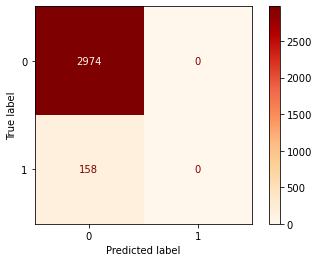

In [98]:
plot_confusion_matrix(gs_rf, X_test, y_test, cmap='OrRd', values_format='d');

In [99]:
rf_new = RandomForestClassifier(n_estimators = 140,
                               min_samples_split = 2,
                               min_samples_leaf = 2,
                               max_depth = 3)
rf_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=140)

In [100]:
rf_new.feature_importances_

array([1.75941969e-01, 4.70112813e-02, 2.24410584e-02, 3.09167719e-02,
       5.71585210e-02, 5.00933767e-02, 6.68132301e-02, 6.93523951e-02,
       5.86638952e-02, 1.30653739e-02, 6.32399306e-02, 3.58613824e-02,
       4.78502729e-02, 3.48673871e-02, 0.00000000e+00, 4.00151252e-03,
       6.29784145e-03, 1.65796807e-02, 1.93777256e-02, 1.14447510e-03,
       2.45719093e-03, 9.01664969e-03, 0.00000000e+00, 1.80941180e-02,
       2.52754919e-03, 0.00000000e+00, 8.14437856e-03, 9.91384687e-03,
       0.00000000e+00, 7.94632705e-04, 1.84771711e-03, 3.68779808e-04,
       4.27249574e-04, 3.28812682e-03, 5.85518218e-04, 3.56551835e-04,
       1.33576358e-03, 9.42952143e-05, 2.77313393e-04, 0.00000000e+00,
       0.00000000e+00, 3.17499794e-03, 2.86227405e-04, 7.90132709e-04,
       2.44927992e-03, 1.28635794e-03, 0.00000000e+00, 1.37426218e-04,
       0.00000000e+00, 8.76402788e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.79101579e-03, 0.00000000e+00,
      

In [101]:
rf_new_coef = pd.DataFrame({'Coeffiecient':X.columns,'Values':np.abs(rf_new.feature_importances_)})
rf_new_coef.sort_values('Values', inplace=True, ascending=False)
rf_new_coef.set_index('Coeffiecient',inplace = True)
rf_new_coef.head(10)

,Values
Coeffiecient,
date,0.175942
dewpoint,0.069352
tavg,0.066813
cool,0.063240
wetbulb,0.058664
tmax,0.057159
tmin,0.050093
resultspeed,0.047850
species,0.047011


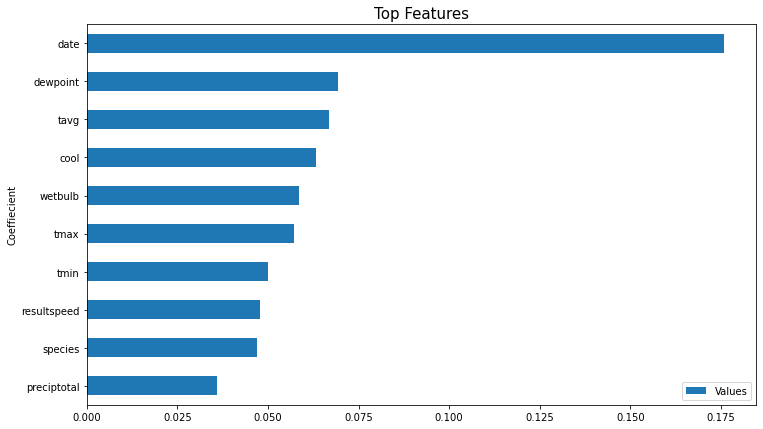

In [102]:
rf_new_coef['Values'].head(10).plot(kind='barh', figsize=(12,7))
plt.title('Top Features', fontsize=15)
plt.gca().invert_yaxis()
plt.legend(loc=4);

#### ROC AUC Curve

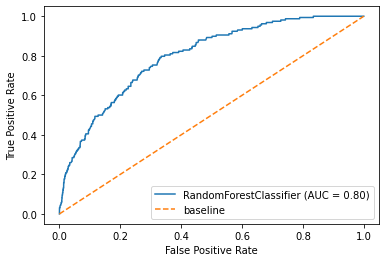

In [103]:
plot_roc_curve(rf_new, X_test,y_test)
plt.plot([0,1], [0,1],label = 'baseline',linestyle='--')
plt.legend();

In [104]:
#Used for ROC-AUC Plot combination in summary
rf_new_probs = rf_new.predict_proba(X_test)
rf_new_probs = rf_new_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_new_probs)

#Calculating ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_new_probs)

#### Sensitivity/Recall and F1-Score

In [105]:
rf_new_pred = rf_new.predict(X_test)
print(classification_report(y_test, rf_new_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2974
           1       0.00      0.00      0.00       158

    accuracy                           0.95      3132
   macro avg       0.47      0.50      0.49      3132
weighted avg       0.90      0.95      0.92      3132



C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------

# Summary of Results

||Logistics|GradientBoost|AdaBoost|RandomForest|
|--|--|--|--|--|
|AUC Train|0.83|0.92|0.89|0.86|
|AUC Test|0.76|0.84|0.83|0.82|
|Sensitivity|1.00|0.99|0.99|1.00|
|F1 Score|0.97|0.97|0.97|0.97|

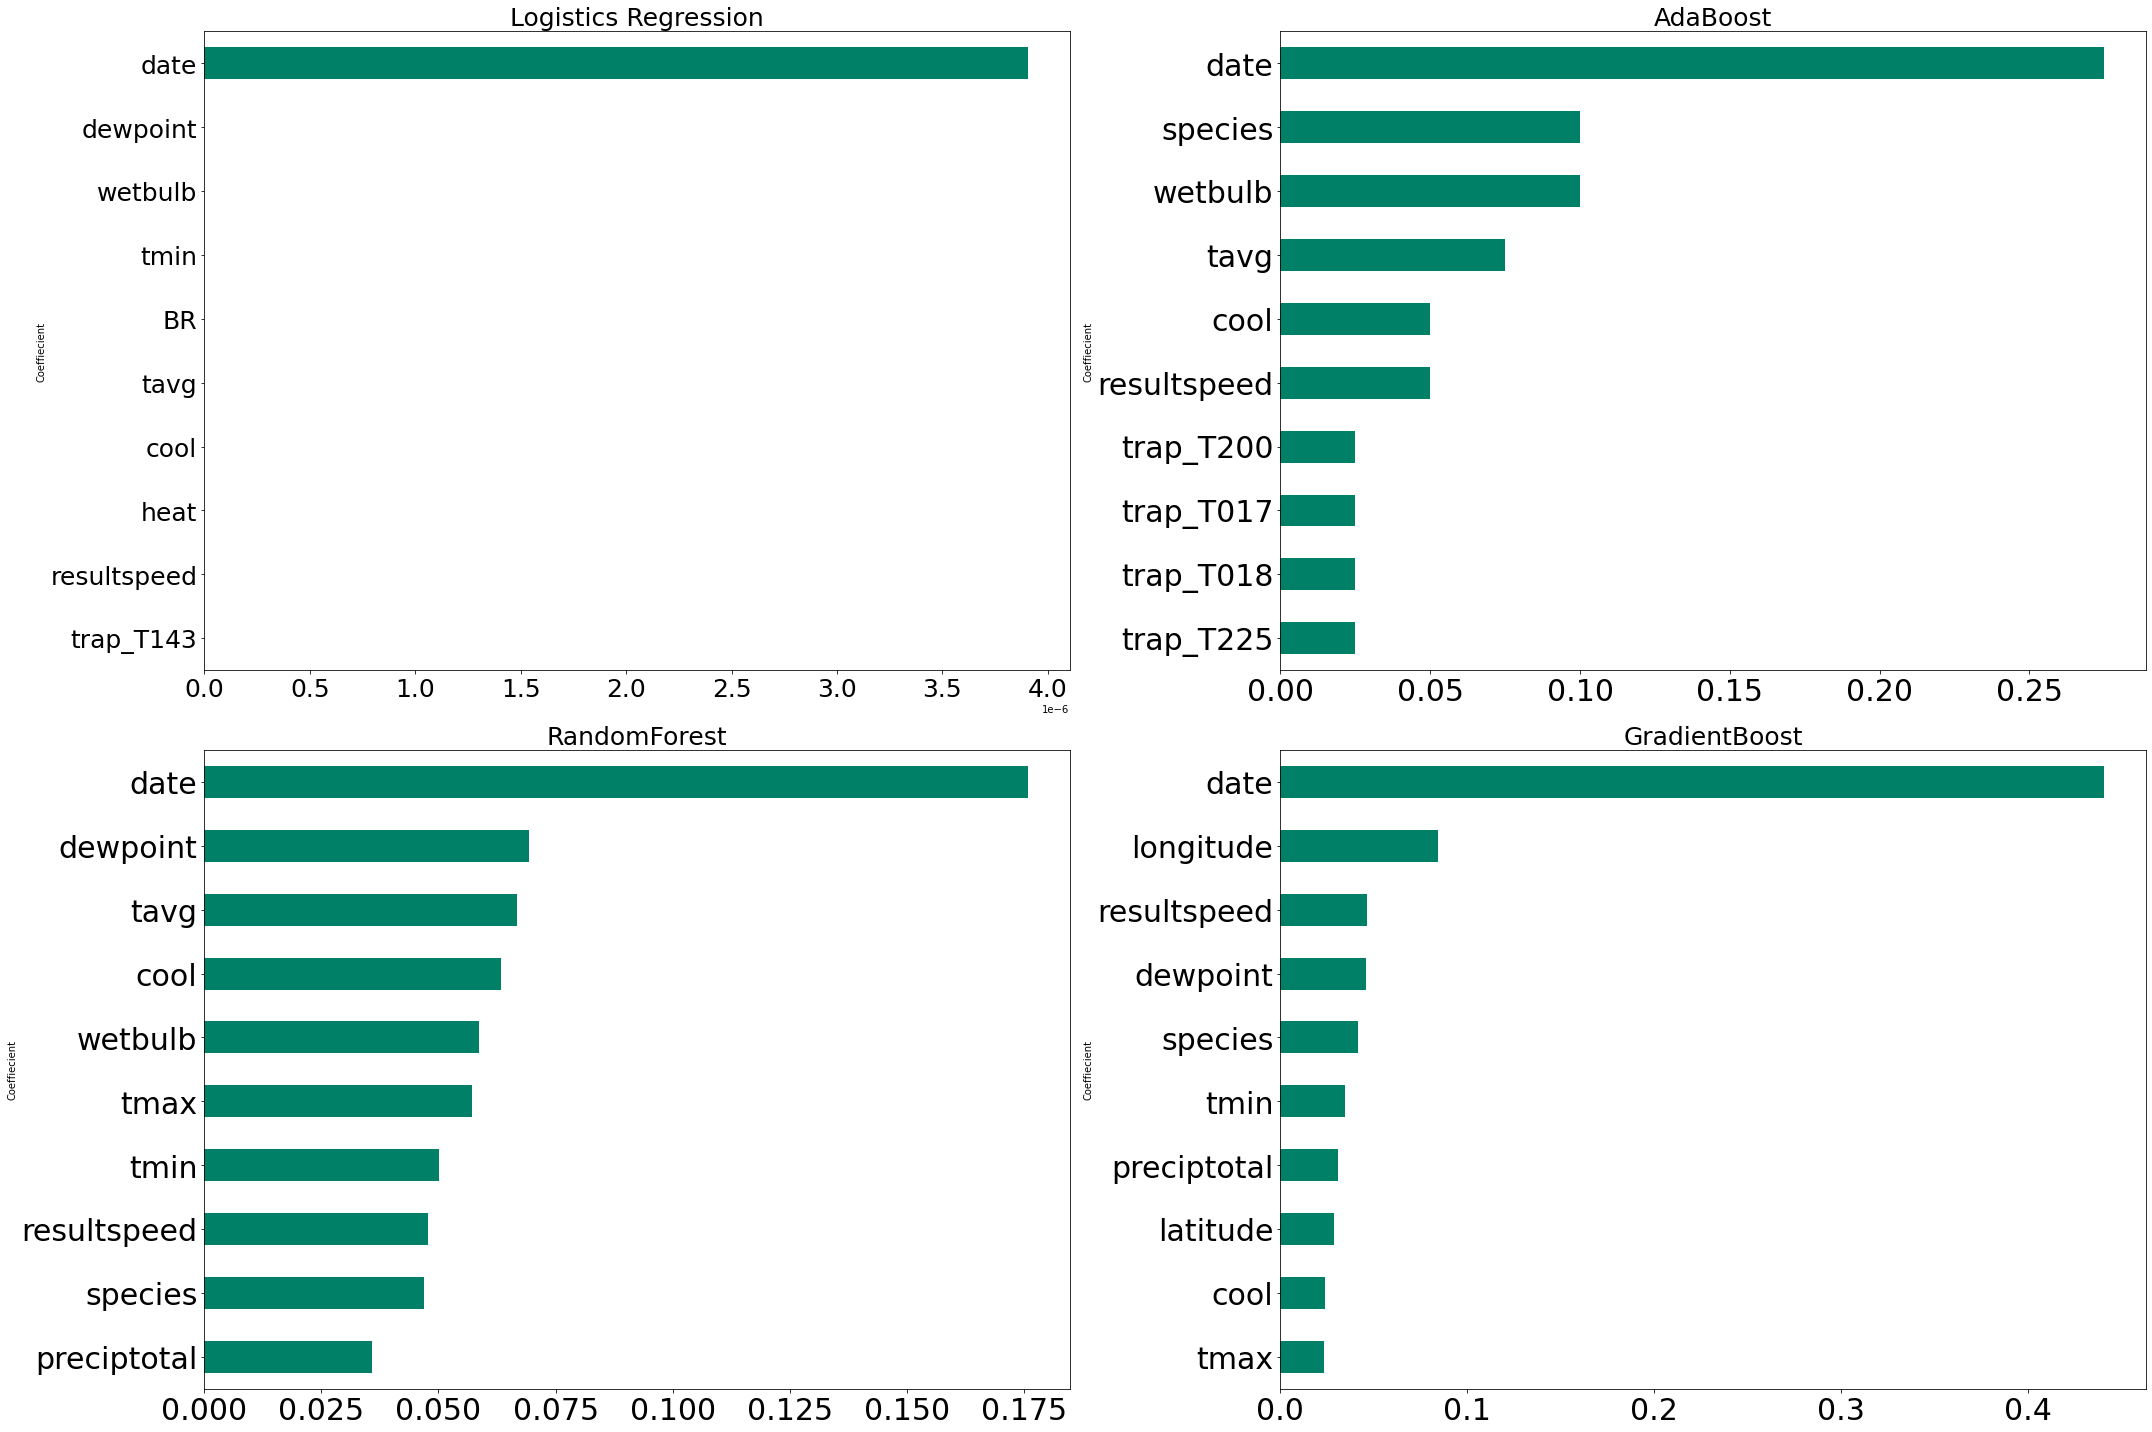

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(30,20))

#Logistics Regression
axes[0, 0].set_title('Logistics Regression',fontsize = 25)
axes[0, 0].tick_params(labelsize=25)
lg_new_coef['Values'].head(10).plot(ax =axes[0, 0],kind='barh',colormap='summer').invert_yaxis()

#RandomForest
axes[1, 0].set_title('RandomForest',fontsize = 25)
axes[1, 0].tick_params(labelsize=30)
rf_new_coef['Values'].head(10).plot(ax =axes[1, 0],kind='barh',colormap='summer').invert_yaxis()

#AdaBoost
axes[0, 1].set_title('AdaBoost',fontsize = 25)
axes[0, 1].tick_params(labelsize=30)
ad_new_coef['Values'].head(10).plot(ax =axes[0, 1],kind='barh',colormap='summer').invert_yaxis()

#GradientBoost
axes[1, 1].set_title('GradientBoost',fontsize = 25)
axes[1, 1].tick_params(labelsize=30)
gb_new_coef['Values'].head(10).plot(ax =axes[1, 1],kind='barh',colormap='summer').invert_yaxis()

fig.tight_layout()

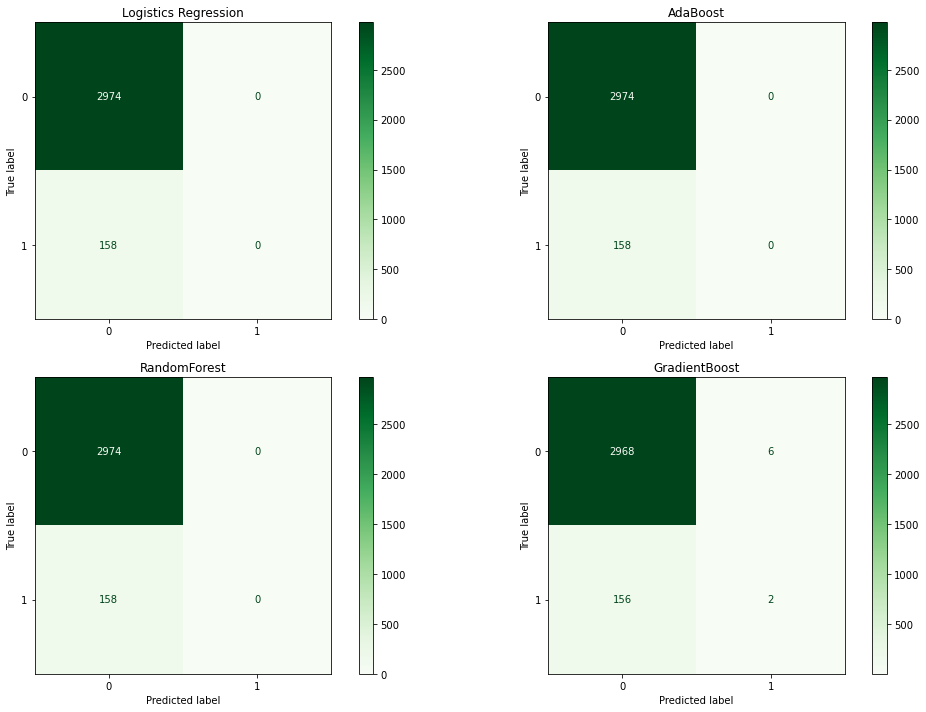

In [107]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

#Logistics Regression
plot_confusion_matrix(gs_lg, X_test, y_test, cmap='Greens', values_format='d',ax=axes[0, 0]);
axes[0, 0].set_title('Logistics Regression')

#RandomForest
plot_confusion_matrix(gs_rf, X_test, y_test, cmap='Greens', values_format='d',ax=axes[1, 0]);
axes[1, 0].set_title('RandomForest')

#AdaBoost
plot_confusion_matrix(gs_ab, X_test, y_test, cmap='Greens', values_format='d',ax=axes[0, 1]);
axes[0, 1].set_title('AdaBoost')

#GradientBoost
plot_confusion_matrix(gs_gb, X_test, y_test, cmap='Greens', values_format='d',ax=axes[1, 1]);
axes[1, 1].set_title('GradientBoost')

fig.tight_layout()

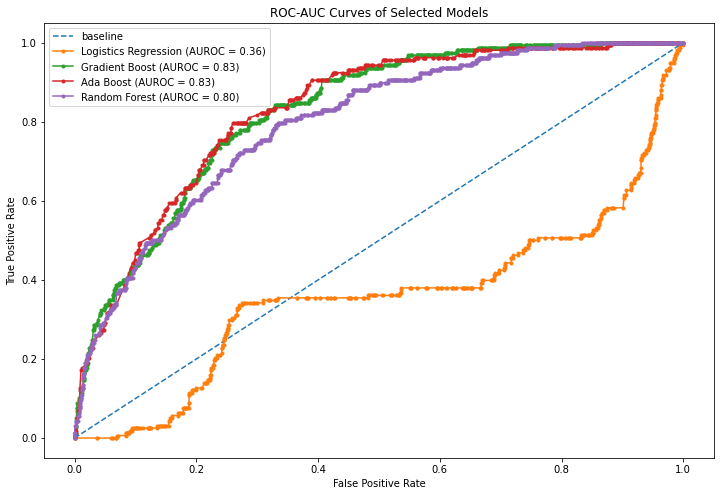

In [108]:
plt.figure(figsize =(12,8))

plt.plot([0,1], [0,1],label = 'baseline',linestyle='--')
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistics Regression (AUROC = %0.2f)' % lg_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost (AUROC = %0.2f)' % gb_auc)
plt.plot(ad_fpr, ad_tpr, marker='.', label='Ada Boost (AUROC = %0.2f)' % ad_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.2f)' % rf_auc)

# Title
plt.title('ROC-AUC Curves of Selected Models')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Recommendation

Based on the Models created, Gradient boost would most likely be the best option to choose in terms of predicting the West Nile Virus

__Problem Statement Resolution__

Following below 2 Recommendations, it will effectively reduce the precense of the WestNileVirus while effectively allocating the resources required to do so.

__Spray Locations__
- ORD Terminal 5, O'Hare International Airport
- 4100 Norht Oak Park Avenue
- 1000 North Central Park Avenue
- 7000 North Moselle Avenue
- 3500 West 116th Street

__Spray Frequency__
- Spray locations every 10-15 days in summer

## Kaggle Submission

In [165]:
gb_new_pred = gb_new.predict(df_test_merged)

In [166]:
kaggle = pd.DataFrame({"WnvPresent": gb_new_pred})
kaggle["id"] = kaggle.index + 1
kaggle = kaggle[["id", "WnvPresent"]]

0    232586
Name: WnvPresent, dtype: int64

In [151]:
df_kagglet.to_csv('kaggle.csv',index=False)